In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("green_tech_data.csv")

data.head(15)


,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0
5,104.598082,324.363006,0.009197,4.891334,0
6,70.329264,469.344631,0.101472,2.823352,0
7,353.161651,779.996025,0.663502,1.953304,0
8,260.390254,305.918349,0.005062,4.078338,0
9,297.825402,169.281919,0.160808,1.718745,0


In [4]:
# Define independent variables (features) and target variable
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [6]:
y_pred = model.predict(X_test)

# Evaluate model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.95

Confusion Matrix:
 [[17  0]
 [ 1  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



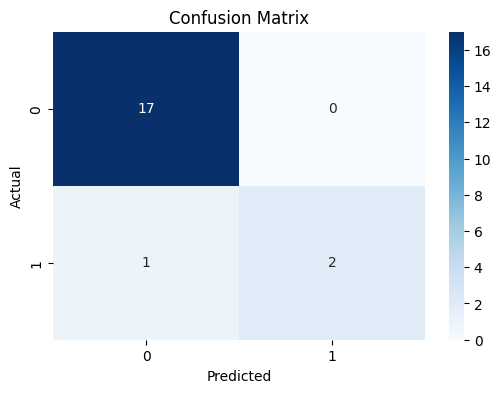

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
y_prob = model.predict_proba(X_test)[:, 1]

threshold = 0.4
y_pred_custom = (y_prob >= threshold).astype(int)

print(f"Accuracy with threshold {threshold}: {accuracy_score(y_test, y_pred_custom):.3f}")


Accuracy with threshold 0.4: 1.000
